<a href="https://colab.research.google.com/github/ryudonggle/lg-aimers-5-/blob/main/DNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [37]:
# Load data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/lg aimers 5기/df_Equipment1.csv")
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lg aimers 5기/test_Equipment1.csv')
sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lg aimers 5기/submission.csv')
sub

,Set ID,target
0,0001be084fbc4aaa9d921f39e595961b,NaN
1,0005bbd180064abd99e63f9ed3e1ac80,NaN
2,000948934c4140d883d670adcb609584,NaN
3,000a6bfd02874c6296dc7b2e9c5678a7,NaN
4,0018e78ce91343678716e2ea27a51c95,NaN
...,...,...
17356,ffea508b59934d689b540f95eb3fa730,NaN
17357,ffed8923c8a448a98afc641b770be153,NaN
17358,fff1e73734da40adbe805359b3efb462,NaN
17359,fff8e38bdd09470baf95f71e92075dec,NaN


In [38]:
df['Chamber Temp. Judge Value_AutoClave'] = df['Chamber Temp. Judge Value_AutoClave'].map({'OK': 0, 'NG': 1})
test_df['Chamber Temp. Judge Value_AutoClave'] = test_df['Chamber Temp. Judge Value_AutoClave'].map({'OK': 0, 'NG': 1})

In [39]:
#중복 컬럼 삭제
dr2=['Model.Suffix_Dam','Model.Suffix_AutoClave','Model.Suffix_Fill1','Model.Suffix_Fill2','Workorder_Dam','Workorder_AutoClave','Workorder_Fill1','Workorder_Fill2',
     'PalletID Collect Result_Fill1','PalletID Collect Result_Fill2','Production Qty Collect Result_Fill1','Production Qty Collect Result_Fill2','Receip No Collect Result_Fill1',
     'Receip No Collect Result_Fill2','Chamber Temp. Judge Value_AutoClave'
 ]
df.drop(columns=dr2,inplace=True)
test_df.drop(columns=dr2,inplace=True)

In [40]:
#dr4 - circle, line값 같음. 아예
dr4=[
       'Stage1 Circle2 Distance Speed Collect Result_Dam',
       'Stage1 Circle3 Distance Speed Collect Result_Dam',
       'Stage1 Circle4 Distance Speed Collect Result_Dam',

       'Stage1 Line2 Distance Speed Collect Result_Dam',
       'Stage1 Line3 Distance Speed Collect Result_Dam',
       'Stage1 Line4 Distance Speed Collect Result_Dam',

       'Stage2 Circle2 Distance Speed Collect Result_Dam',
       'Stage2 Circle3 Distance Speed Collect Result_Dam',
       'Stage2 Circle4 Distance Speed Collect Result_Dam',

       'Stage2 Line2 Distance Speed Collect Result_Dam',
       'Stage2 Line3 Distance Speed Collect Result_Dam',
       'Stage2 Line4 Distance Speed Collect Result_Dam',

       'Stage3 Circle2 Distance Speed Collect Result_Dam',
       'Stage3 Circle3 Distance Speed Collect Result_Dam',
       'Stage3 Circle4 Distance Speed Collect Result_Dam',

       'Stage3 Line2 Distance Speed Collect Result_Dam',
       'Stage3 Line4 Distance Speed Collect Result_Dam',]

df.drop(columns=dr4,inplace=True)
test_df.drop(columns=dr4,inplace=True)

In [41]:
#train

#합계/평균/최대/최소/표준편차/분산/비율
#Dam
df['MEAN DISCHARGED TIME OF RESIN_Dam']=df[['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam']].mean(axis=1)
df['STD DISCHARGED TIME OF RESIN_Dam']=df[['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam']].std(axis=1)
df['SUM DISCHARGED TIME OF RESIN_Dam']=df[['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam']].sum(axis=1)

df['MEAN Dispense Volume_Dam']=df[['Dispense Volume(Stage1) Collect Result_Dam',
       'Dispense Volume(Stage2) Collect Result_Dam',
       'Dispense Volume(Stage3) Collect Result_Dam']].mean(axis=1)
df['STD Dispense Volume_Dam']=df[['Dispense Volume(Stage1) Collect Result_Dam',
       'Dispense Volume(Stage2) Collect Result_Dam',
       'Dispense Volume(Stage3) Collect Result_Dam']].std(axis=1)
df['SUM Dispense Volume_Dam']=df[['Dispense Volume(Stage1) Collect Result_Dam',
       'Dispense Volume(Stage2) Collect Result_Dam',
       'Dispense Volume(Stage3) Collect Result_Dam']].sum(axis=1)

#비율 - 같은 용량이 나오는 데에 걸리는 시간
df['DIV Dispense Volume(Stage1)_Dam']=df['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam']/df['Dispense Volume(Stage1) Collect Result_Dam']
df['DIV Dispense Volume(Stage2)_Dam']=df['DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam']/df['Dispense Volume(Stage2) Collect Result_Dam']
df['DIV Dispense Volume(Stage3)_Dam']=df['DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam']/df['Dispense Volume(Stage3) Collect Result_Dam']

#Fill1
#합계/평균/최대/최소/표준편차/분산/비율

df['MEAN DISCHARGED TIME OF RESIN_Fill1']=df[['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1',
       'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1',
       'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1']].mean(axis=1)
df['STD DISCHARGED TIME OF RESIN_Fill1']=df[['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1',
       'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1',
       'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1']].std(axis=1)
df['SUM DISCHARGED TIME OF RESIN_Fill1']=df[['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1',
       'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1',
       'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1']].sum(axis=1)

df['MEAN Dispense Volume_Fill1']=df[['Dispense Volume(Stage1) Collect Result_Fill1',
       'Dispense Volume(Stage2) Collect Result_Fill1',
       'Dispense Volume(Stage3) Collect Result_Fill1']].mean(axis=1)
df['STD Dispense Volume_Fill1']=df[['Dispense Volume(Stage1) Collect Result_Fill1',
       'Dispense Volume(Stage2) Collect Result_Fill1',
       'Dispense Volume(Stage3) Collect Result_Fill1']].std(axis=1)
df['SUM Dispense Volume_Fill1']=df[['Dispense Volume(Stage1) Collect Result_Fill1',
       'Dispense Volume(Stage2) Collect Result_Fill1',
       'Dispense Volume(Stage3) Collect Result_Fill1']].sum(axis=1)

#비율 - 같은 용량이 나오는 데에 걸리는 시간
df['DIV Dispense Volume(Stage1)_Fill1']=df['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1']/df['Dispense Volume(Stage1) Collect Result_Fill1']
df['DIV Dispense Volume(Stage2)_Fill1']=df['DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1']/df['Dispense Volume(Stage2) Collect Result_Fill1']
df['DIV Dispense Volume(Stage3)_Fill1']=df['DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1']/df['Dispense Volume(Stage3) Collect Result_Fill1']

#Thickness(변화가 있는지도 비율로 보면 좋을듯)

df['SUM THICKNESS_Dam']=df[['THICKNESS 1 Collect Result_Dam', 'THICKNESS 2 Collect Result_Dam','THICKNESS 3 Collect Result_Dam']].sum(axis=1)
df['MEAN THICKNESS_Dam']=df[['THICKNESS 1 Collect Result_Dam', 'THICKNESS 2 Collect Result_Dam','THICKNESS 3 Collect Result_Dam']].mean(axis=1)
df['STD THICKNESS_Dam']=df[['THICKNESS 1 Collect Result_Dam', 'THICKNESS 2 Collect Result_Dam','THICKNESS 3 Collect Result_Dam']].std(axis=1)

df['DIV1 THICKNESS_Dam']=df['THICKNESS 2 Collect Result_Dam']/df['THICKNESS 1 Collect Result_Dam']
df['DIV2 THICKNESS_Dam']=df['THICKNESS 3 Collect Result_Dam']/df['THICKNESS 2 Collect Result_Dam']

#1st/2nd/3rd - 'THICKNESS 1 Collect Result_Dam', 'THICKNESS 2 Collect Result_Dam''THICKNESS 3 Collect Result_Dam'
df['SUM Pressure_AutoClave']=df[['1st Pressure Collect Result_AutoClave', '2nd Pressure Collect Result_AutoClave', '3rd Pressure Collect Result_AutoClave']].sum(axis=1)
df['MEAN Pressure_AutoClave']=df[['1st Pressure Collect Result_AutoClave', '2nd Pressure Collect Result_AutoClave', '3rd Pressure Collect Result_AutoClave']].mean(axis=1)
df['STD Pressure_AutoClave']=df[['1st Pressure Collect Result_AutoClave', '2nd Pressure Collect Result_AutoClave', '3rd Pressure Collect Result_AutoClave']].std(axis=1)

df['DIV1 Pressure_AutoClave']=df['2nd Pressure Collect Result_AutoClave']/df['1st Pressure Collect Result_AutoClave']
df['DIV2 Pressure_AutoClave']=df['3rd Pressure Collect Result_AutoClave']/df['2nd Pressure Collect Result_AutoClave']

In [42]:
#train

#합계/평균/최대/최소/표준편차/분산/비율
#Dam
test_df['MEAN DISCHARGED TIME OF RESIN_Dam']=test_df[['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam']].mean(axis=1)
test_df['STD DISCHARGED TIME OF RESIN_Dam']=test_df[['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam']].std(axis=1)
test_df['SUM DISCHARGED TIME OF RESIN_Dam']=test_df[['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam']].sum(axis=1)

test_df['MEAN Dispense Volume_Dam']=test_df[['Dispense Volume(Stage1) Collect Result_Dam',
       'Dispense Volume(Stage2) Collect Result_Dam',
       'Dispense Volume(Stage3) Collect Result_Dam']].mean(axis=1)
test_df['STD Dispense Volume_Dam']=test_df[['Dispense Volume(Stage1) Collect Result_Dam',
       'Dispense Volume(Stage2) Collect Result_Dam',
       'Dispense Volume(Stage3) Collect Result_Dam']].std(axis=1)
test_df['SUM Dispense Volume_Dam']=test_df[['Dispense Volume(Stage1) Collect Result_Dam',
       'Dispense Volume(Stage2) Collect Result_Dam',
       'Dispense Volume(Stage3) Collect Result_Dam']].sum(axis=1)

#비율 - 같은 용량이 나오는 데에 걸리는 시간
test_df['DIV Dispense Volume(Stage1)_Dam']=test_df['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam']/test_df['Dispense Volume(Stage1) Collect Result_Dam']
test_df['DIV Dispense Volume(Stage2)_Dam']=test_df['DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam']/test_df['Dispense Volume(Stage2) Collect Result_Dam']
test_df['DIV Dispense Volume(Stage3)_Dam']=test_df['DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam']/test_df['Dispense Volume(Stage3) Collect Result_Dam']

#Fill1
#합계/평균/최대/최소/표준편차/분산/비율

test_df['MEAN DISCHARGED TIME OF RESIN_Fill1']=test_df[['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1',
       'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1',
       'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1']].mean(axis=1)
test_df['STD DISCHARGED TIME OF RESIN_Fill1']=test_df[['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1',
       'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1',
       'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1']].std(axis=1)
test_df['SUM DISCHARGED TIME OF RESIN_Fill1']=test_df[['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1',
       'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1',
       'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1']].sum(axis=1)

test_df['MEAN Dispense Volume_Fill1']=test_df[['Dispense Volume(Stage1) Collect Result_Fill1',
       'Dispense Volume(Stage2) Collect Result_Fill1',
       'Dispense Volume(Stage3) Collect Result_Fill1']].mean(axis=1)
test_df['STD Dispense Volume_Fill1']=test_df[['Dispense Volume(Stage1) Collect Result_Fill1',
       'Dispense Volume(Stage2) Collect Result_Fill1',
       'Dispense Volume(Stage3) Collect Result_Fill1']].std(axis=1)
test_df['SUM Dispense Volume_Fill1']=test_df[['Dispense Volume(Stage1) Collect Result_Fill1',
       'Dispense Volume(Stage2) Collect Result_Fill1',
       'Dispense Volume(Stage3) Collect Result_Fill1']].sum(axis=1)

#비율 - 같은 용량이 나오는 데에 걸리는 시간
test_df['DIV Dispense Volume(Stage1)_Fill1']=test_df['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1']/test_df['Dispense Volume(Stage1) Collect Result_Fill1']
test_df['DIV Dispense Volume(Stage2)_Fill1']=test_df['DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1']/test_df['Dispense Volume(Stage2) Collect Result_Fill1']
test_df['DIV Dispense Volume(Stage3)_Fill1']=test_df['DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1']/test_df['Dispense Volume(Stage3) Collect Result_Fill1']

#Thickness(변화가 있는지도 비율로 보면 좋을듯)

test_df['SUM THICKNESS_Dam']=test_df[['THICKNESS 1 Collect Result_Dam', 'THICKNESS 2 Collect Result_Dam','THICKNESS 3 Collect Result_Dam']].sum(axis=1)
test_df['MEAN THICKNESS_Dam']=test_df[['THICKNESS 1 Collect Result_Dam', 'THICKNESS 2 Collect Result_Dam','THICKNESS 3 Collect Result_Dam']].mean(axis=1)
test_df['STD THICKNESS_Dam']=test_df[['THICKNESS 1 Collect Result_Dam', 'THICKNESS 2 Collect Result_Dam','THICKNESS 3 Collect Result_Dam']].std(axis=1)

test_df['DIV1 THICKNESS_Dam']=test_df['THICKNESS 2 Collect Result_Dam']/test_df['THICKNESS 1 Collect Result_Dam']
test_df['DIV2 THICKNESS_Dam']=test_df['THICKNESS 3 Collect Result_Dam']/test_df['THICKNESS 2 Collect Result_Dam']

#1st/2nd/3rd - 'THICKNESS 1 Collect Result_Dam', 'THICKNESS 2 Collect Result_Dam''THICKNESS 3 Collect Result_Dam'
test_df['SUM Pressure_AutoClave']=test_df[['1st Pressure Collect Result_AutoClave', '2nd Pressure Collect Result_AutoClave', '3rd Pressure Collect Result_AutoClave']].sum(axis=1)
test_df['MEAN Pressure_AutoClave']=test_df[['1st Pressure Collect Result_AutoClave', '2nd Pressure Collect Result_AutoClave', '3rd Pressure Collect Result_AutoClave']].mean(axis=1)
test_df['STD Pressure_AutoClave']=test_df[['1st Pressure Collect Result_AutoClave', '2nd Pressure Collect Result_AutoClave', '3rd Pressure Collect Result_AutoClave']].std(axis=1)

test_df['DIV1 Pressure_AutoClave']=test_df['2nd Pressure Collect Result_AutoClave']/test_df['1st Pressure Collect Result_AutoClave']
test_df['DIV2 Pressure_AutoClave']=test_df['3rd Pressure Collect Result_AutoClave']/test_df['2nd Pressure Collect Result_AutoClave']

In [43]:
#0으로 나누어 생기 nan값 0으로 처리
df['DIV1 THICKNESS_Dam']=df['DIV1 THICKNESS_Dam'].fillna(0)
df['DIV2 THICKNESS_Dam']=df['DIV2 THICKNESS_Dam'].fillna(0)

test_df['DIV1 THICKNESS_Dam']=test_df['DIV1 THICKNESS_Dam'].fillna(0)
test_df['DIV2 THICKNESS_Dam']=test_df['DIV2 THICKNESS_Dam'].fillna(0)
print(df['DIV1 THICKNESS_Dam'].isna().sum()) #확인

0


In [44]:
#파생변수 시각화 후 삭제 + 애매한 변수 drop

dr_new=['STD Dispense Volume_Dam','STD DISCHARGED TIME OF RESIN_Fill1','STD THICKNESS_Dam',
        'MEAN DISCHARGED TIME OF RESIN_Dam','STD DISCHARGED TIME OF RESIN_Dam','SUM DISCHARGED TIME OF RESIN_Dam'
        ,'DIV Dispense Volume(Stage1)_Dam','MEAN DISCHARGED TIME OF RESIN_Fill1','SUM Dispense Volume_Fill1','DIV Dispense Volume(Stage1)_Fill1','DIV Dispense Volume(Stage2)_Fill1','DIV Dispense Volume(Stage3)_Fill1'
        ,'SUM THICKNESS_Dam','MEAN THICKNESS_Dam','STD Pressure_AutoClave'
        ]
df.drop(columns=dr_new,inplace=True)
test_df.drop(columns=dr_new,inplace=True)

In [45]:
df['target']=np.where(df['target']=='AbNormal',1,0)

(24968, 16, 3)


In [33]:
X=df.drop(columns=['target'])
y=df[['target']]

In [34]:
test_x=test_df.drop(columns=['Set ID'])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_val dataset: ", x_val.shape)
print("Number transactions y_val dataset: ", y_val.shape)

In [36]:
x_train

,CURE SPEED Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage2) Collect Result_Dam,Dispense Volume(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam,...,DIV Dispense Volume(Stage3)_Dam,SUM DISCHARGED TIME OF RESIN_Fill1,MEAN Dispense Volume_Fill1,STD Dispense Volume_Fill1,DIV1 THICKNESS_Dam,DIV2 THICKNESS_Dam,SUM Pressure_AutoClave,MEAN Pressure_AutoClave,DIV1 Pressure_AutoClave,DIV2 Pressure_AutoClave
22666,70,10,9.7,3.9,9.6,0.67,0.27,0.67,549.0,463.0,...,14.328358,31.5,9.970000,4.607255,0.0,0.0,1.124,0.374667,1.000000,1.602564
15925,70,10,21.3,10.5,21.3,1.49,0.73,1.49,550.3,463.6,...,14.295302,30.7,9.720000,5.456189,0.0,0.0,1.111,0.370333,1.000000,1.618893
8197,70,10,17.0,4.9,17.0,1.19,0.34,1.19,550.0,463.5,...,14.285714,30.6,9.686667,5.427093,0.0,0.0,1.305,0.435000,1.620130,0.997996
5862,70,16,13.2,6.6,13.2,1.45,0.72,1.45,551.5,465.0,...,9.103448,31.7,10.036667,4.907732,0.0,0.0,1.149,0.383000,1.000000,1.830000
3947,70,10,17.0,4.9,17.0,1.19,0.34,1.19,550.0,463.5,...,14.285714,30.6,9.686667,5.427093,0.0,0.0,1.114,0.371333,1.006536,1.623377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,70,10,9.6,5.0,9.7,0.67,0.35,0.67,549.0,462.5,...,14.477612,30.5,9.656667,5.401299,0.0,0.0,1.118,0.372667,1.000000,1.618123
5390,70,10,9.6,4.9,9.7,0.67,0.34,0.67,549.0,463.0,...,14.477612,31.9,10.100000,4.633454,0.0,0.0,1.305,0.435000,1.639344,1.000000
860,70,16,13.2,7.5,13.2,0.92,0.52,0.92,550.4,463.7,...,14.347826,29.8,9.433333,4.878610,0.0,0.0,1.287,0.429000,1.647651,1.014257
15795,70,16,13.2,8.1,13.2,0.92,0.56,0.92,548.9,462.2,...,14.347826,29.4,9.306667,5.098003,0.0,0.0,1.302,0.434000,1.576923,1.012195


In [ ]:
coordinate_columns = ['Work_x',
                      'Work_y',
                      'Work_z',
                      'Suffix_x',
                      'Suffix_y',
                      'Suffix_z',
                      'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
                      'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam',
                      'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam',
                      'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam',
                      'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam',
                      'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam',
                      'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam',
                      'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam',
                      'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam',
                      'Head Clean Position X Collect Result_Dam',
                      'Head Clean Position Y Collect Result_Dam',
                      'Head Clean Position Z Collect Result_Dam',
                      'Head Purge Position X Collect Result_Dam',
                      'Head Purge Position Y Collect Result_Dam',
                      'Head Purge Position Z Collect Result_Dam',
                      'Head Zero Position X Collect Result_Dam',
                      'Head Zero Position Y Collect Result_Dam',
                      'Head Zero Position Z Collect Result_Dam',
                      'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
                      'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1',
                      'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill1',
                      'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1',
                      'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1',
                      'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1',
                      'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1',
                      'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill1',
                      'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill1',
                      'Head Purge Position X Collect Result_Fill1',
                      'Head Purge Position Y Collect Result_Fill1',
                      'Head Purge Position Z Collect Result_Fill1',
                      'CURE END POSITION X Collect Result_Fill2',
                      'CURE END POSITION Z Collect Result_Fill2',
                      'CURE END POSITION Θ Collect Result_Fill2',
                      'CURE STANDBY POSITION X Collect Result_Fill2',
                      'CURE STANDBY POSITION Z Collect Result_Fill2',
                      'CURE STANDBY POSITION Θ Collect Result_Fill2',
                      'CURE START POSITION X Collect Result_Fill2',
                      'CURE START POSITION Z Collect Result_Fill2',
                      'CURE START POSITION Θ Collect Result_Fill2',
                      'Head Purge Position X Collect Result_Fill2',
                      'Head Purge Position Y Collect Result_Fill2',
                      'Head Purge Position Z Collect Result_Fill2'
                      ]

In [ ]:
df_coordinates = df[coordinate_columns]
test_df_coordinates = test_df[coordinate_columns]
# 좌표 데이터에서 절대값을 적용
df_coordinates = df[coordinate_columns].abs()
test_df_coordinates = test_df[coordinate_columns].abs()
df_coordinates

In [ ]:
# NumPy 배열로 변환
df_coordinates_array = np.array(df_coordinates)
test_df_coordinates_array = np.array(test_df_coordinates)

df_coordinates_array.shape

In [ ]:
# 좌표 데이터를 배열로 변환
coords_array = np.array(df_coordinates)

# 시계열 데이터로 변환
T = 16  # 타임 스텝 (예를 들어 16개의 좌표 쌍)
F = 3   # 피처 수 (x, y, z)

# 데이터 재구성 (N, T, F)
coords_reshaped = coords_array.reshape(-1, T, F)
print(coords_reshaped.shape)  # (샘플 수, 16, 3)

In [15]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
train_scaled = SS.fit_transform(X)
test_scaled = SS.transform(test_x)
test_scaled

array([[-0.36247354, -0.80745173, -0.98601476, ..., -0.78864809,
        -0.87368453,  0.89615293],
       [-0.36247354,  1.23846412, -0.06904356, ...,  0.88862009,
         1.13891826, -1.12004901],
       [-0.36247354, -0.80745173, -1.01221394, ...,  1.14739861,
         0.98313619, -1.16002561],
       ...,
       [-0.36247354,  1.23846412, -0.06904356, ..., -0.81740126,
        -0.87368453,  0.86412768],
       [-0.36247354, -0.80745173, -0.98601476, ..., -0.89407638,
        -0.86312684,  0.94475265],
       [-0.36247354, -0.80745173,  0.92652517, ..., -0.93241393,
        -0.86302127,  1.0202818 ]])

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_scaled, y, test_size=0.2, random_state=42)
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_val dataset: ", x_val.shape)
print("Number transactions y_val dataset: ", y_val.shape)

Number transactions x_train dataset:  (19974, 101)
Number transactions y_train dataset:  (19974, 1)
Number transactions x_val dataset:  (4994, 101)
Number transactions y_val dataset:  (4994, 1)


In [17]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [40]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      Input(shape=(x_train.shape[-1],)),  # 입력 데이터의 특성 수를 설정
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(64, activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-4),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [19]:
EPOCHS = 100
BATCH_SIZE = 4096

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc',
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [20]:
model = make_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          13,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,401 (212.50 KB)

 Trainable params: 54,401 (212.50 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
neg, pos = np.bincount(df['target'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 24968
    Positive: 1423 (5.70% of total)



In [22]:
initial_bias = np.log([pos/neg])
initial_bias

array([-2.80614616])

In [23]:
# 임시 디렉토리와 파일 경로 생성
initial_weights_path = os.path.join(tempfile.mkdtemp(), 'initial_weights.weights.h5')

# 모델의 초기 가중치 저장
model.save_weights(initial_weights_path)

In [24]:
model = make_model()
model.load_weights(initial_weights_path)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(x_val, y_val),
    verbose=1)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5372 - auc: 0.4826 - fn: 444.3333 - fp: 5737.8335 - loss: 0.7810 - prc: 0.0546 - precision: 0.0551 - recall: 0.4340 - tn: 6967.6665 - tp: 334.8333 - val_accuracy: 0.9139 - val_auc: 0.5002 - val_fn: 274.0000 - val_fp: 156.0000 - val_loss: 0.5820 - val_prc: 0.0529 - val_precision: 0.0250 - val_recall: 0.0144 - val_tn: 4560.0000 - val_tp: 4.0000
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.6141 - auc: 0.5021 - fn: 473.5000 - fp: 4689.3335 - loss: 0.6893 - prc: 0.0564 - precision: 0.0566 - recall: 0.3816 - tn: 8037.8335 - tp: 284.0000 - val_accuracy: 0.9395 - val_auc: 0.4921 - val_fn: 278.0000 - val_fp: 24.0000 - val_loss: 0.5316 - val_prc: 0.0514 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_tn: 4692.0000 - val_tp: 0.0000e+00
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6685 - auc: 0.4915 - fn: 555.5000 - fp: 3860.3333 - loss: 0.6317 - prc: 0.0596 - precision: 0.0578 - recall: 0.

In [25]:
model = make_model()
model.load_weights(initial_weights_path)
careful_bias_history = model.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(x_val, y_val),
    verbose=1)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.7465 - auc: 0.5156 - fn: 813.8333 - fp: 4050.3333 - loss: 0.6569 - prc: 0.0584 - precision: 0.0570 - recall: 0.2198 - tn: 13371.8330 - tp: 242.6667 - val_accuracy: 0.9399 - val_auc: 0.4961 - val_fn: 278.0000 - val_fp: 22.0000 - val_loss: 0.4831 - val_prc: 0.0525 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_tn: 4694.0000 - val_tp: 0.0000e+00
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.7164 - auc: 0.5087 - fn: 571.5000 - fp: 3206.0000 - loss: 0.5863 - prc: 0.0613 - precision: 0.0631 - recall: 0.2763 - tn: 9495.1670 - tp: 212.0000 - val_accuracy: 0.9443 - val_auc: 0.4908 - val_fn: 278.0000 - val_fp: 0.0000e+00 - val_loss: 0.4429 - val_prc: 0.0511 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_tn: 4716.0000 - val_tp: 0.0000e+00
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7724 - auc: 0.5033 - fn: 613.8333 - fp: 2424.3333 - loss: 0.5303 - prc: 0.0570 - precision: 0.0591 - recal

In [26]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

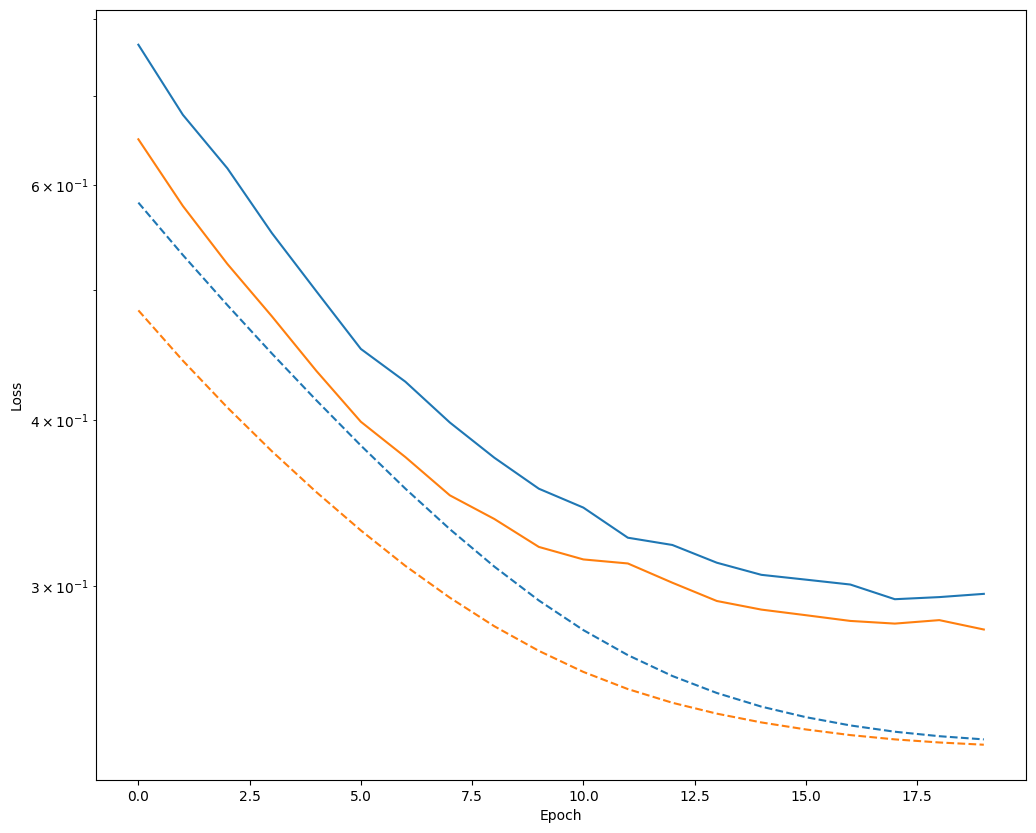

In [27]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [28]:
model = make_model()
model.load_weights(initial_weights_path)
baseline_history = model.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(x_val, y_val),
    verbose=1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.7411 - auc: 0.5128 - fn: 818.6667 - fp: 4146.5000 - loss: 0.6644 - prc: 0.0576 - precision: 0.0548 - recall: 0.2161 - tn: 13276.0000 - tp: 237.5000 - val_accuracy: 0.9399 - val_auc: 0.4972 - val_fn: 278.0000 - val_fp: 22.0000 - val_loss: 0.4832 - val_prc: 0.0525 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_tn: 4694.0000 - val_tp: 0.0000e+00
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7212 - auc: 0.4988 - fn: 591.3333 - fp: 3128.5000 - loss: 0.5839 - prc: 0.0565 - precision: 0.0570 - recall: 0.2464 - tn: 9580.0000 - tp: 184.8333 - val_accuracy: 0.9443 - val_auc: 0.4914 - val_fn: 278.0000 - val_fp: 0.0000e+00 - val_loss: 0.4430 - val_prc: 0.0511 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_tn: 4716.0000 - val_tp: 0.0000e+00
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7714 - auc: 0.5185 - fn: 604.5000 - fp: 2438.0000 - loss: 0.5263 - prc: 0.0610 - precision: 0.0638 - reca

In [29]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

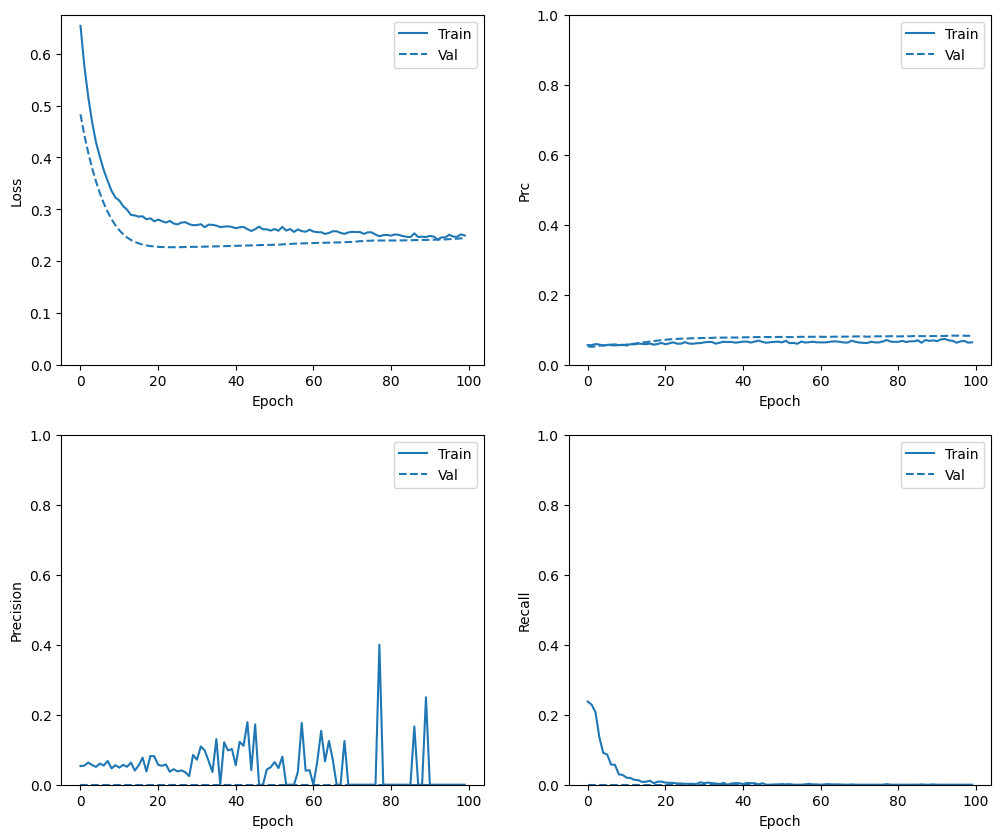

In [30]:
plot_metrics(baseline_history)


In [31]:
train_predictions_baseline = model.predict(x_train, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(x_val, batch_size=BATCH_SIZE)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


In [32]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.2418215274810791
compile_metrics :  0.0

Legitimate Transactions Detected (True Negatives):  4716
Legitimate Transactions Incorrectly Detected (False Positives):  0
Fraudulent Transactions Missed (False Negatives):  278
Fraudulent Transactions Detected (True Positives):  0
Total Fraudulent Transactions:  278


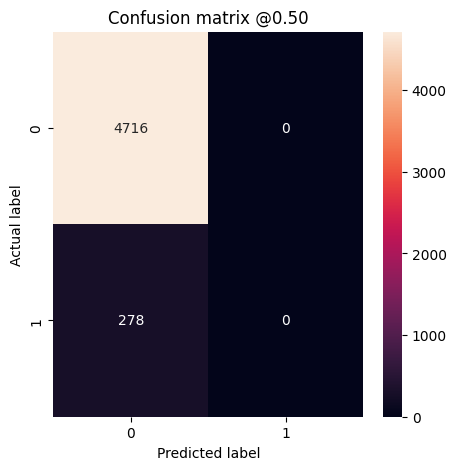

In [33]:
baseline_results = model.evaluate(x_val, y_val,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(y_val, test_predictions_baseline)

In [34]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.53
Weight for class 1: 8.77


In [38]:
class_weight = {0: 0.53, 1: 8.77}

In [39]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights_path)

weighted_history = weighted_model.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(x_val, y_val),
    class_weight=class_weight,
    verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.7283 - auc: 0.5201 - fn: 780.0000 - fp: 4474.8335 - loss: 0.8394 - prc: 0.0591 - precision: 0.0583 - recall: 0.2474 - tn: 12945.3330 - tp: 278.5000 - val_accuracy: 0.9187 - val_auc: 0.5145 - val_fn: 273.0000 - val_fp: 133.0000 - val_loss: 0.5464 - val_prc: 0.0583 - val_precision: 0.0362 - val_recall: 0.0180 - val_tn: 4583.0000 - val_tp: 5.0000
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6178 - auc: 0.5160 - fn: 459.1667 - fp: 4706.8335 - loss: 0.8058 - prc: 0.0597 - precision: 0.0618 - recall: 0.4031 - tn: 8005.1665 - tp: 313.5000 - val_accuracy: 0.9171 - val_auc: 0.5322 - val_fn: 271.0000 - val_fp: 143.0000 - val_loss: 0.5588 - val_prc: 0.0609 - val_precision: 0.0467 - val_recall: 0.0252 - val_tn: 4573.0000 - val_tp: 7.0000
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6038 - auc: 0.5104 - fn: 455.8333 - fp: 4906.3335 - loss: 0.8070 - prc: 0.0590 - precision: 0.0610 - recall: 0.4112 - 

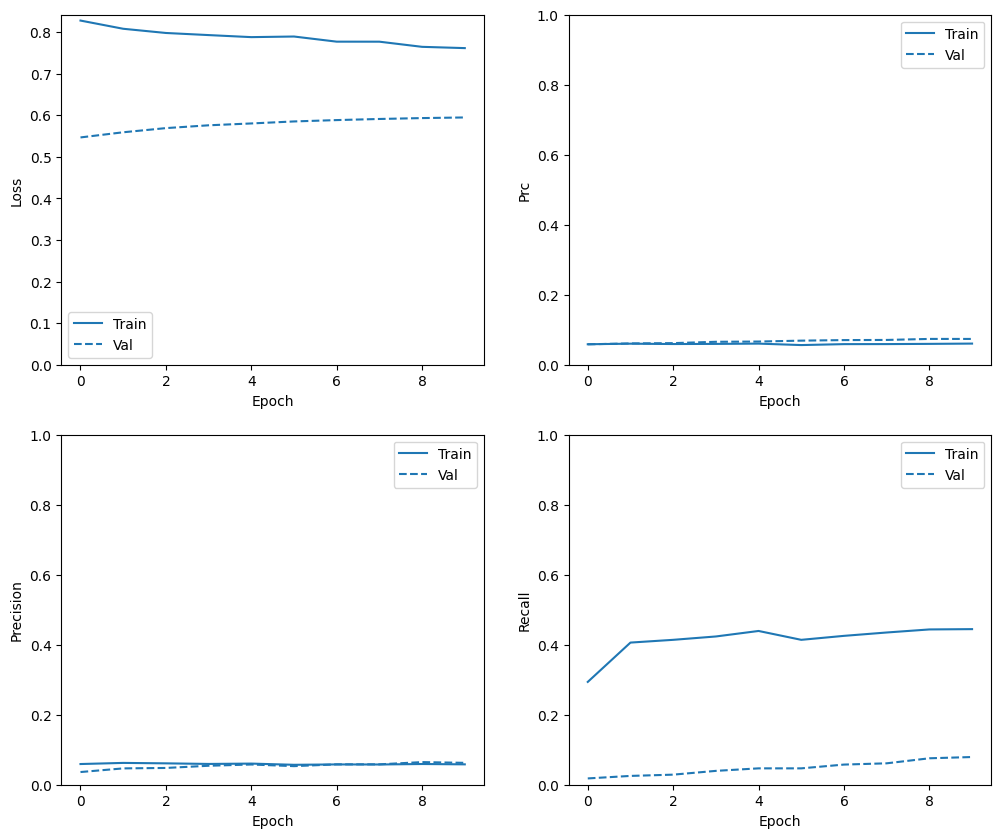

In [41]:
plot_metrics(weighted_history)


In [42]:
train_predictions_weighted = weighted_model.predict(x_train, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(x_val, batch_size=BATCH_SIZE)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


loss :  0.5463936924934387
compile_metrics :  5.0

Legitimate Transactions Detected (True Negatives):  4583
Legitimate Transactions Incorrectly Detected (False Positives):  133
Fraudulent Transactions Missed (False Negatives):  273
Fraudulent Transactions Detected (True Positives):  5
Total Fraudulent Transactions:  278


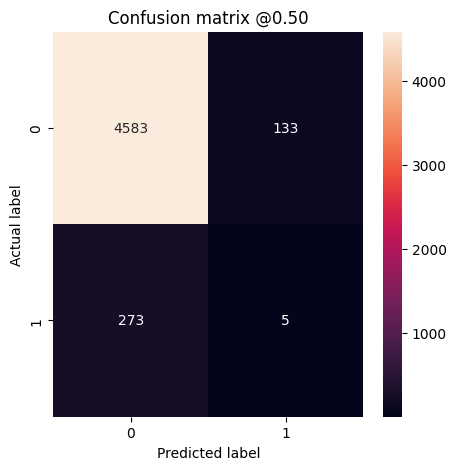

In [43]:
weighted_results = weighted_model.evaluate(x_val, y_val,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(y_val, test_predictions_weighted)